# PyFECONS

In [1]:
project="CATF"

**Novatron to do:**

*   Update CAD to have radial DE converters
*   Fill out calculations for 30 onwards, particularly 91-99
*   Calcs for 22
* Calcs for 11-19
* CAS Structure table


In [3]:
#INSTALL PACKAGES
#----FIRST TIME ONLY------
#Have to do this every time colab resets :/
!pip install PyLaTeX
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!apt-get update
#!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
#!apt-get install --fix-missing texlive texlive-xetex texlive-latex-extra pandoc
!pip install cadquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 488.8 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyLaTeX: filename=PyLaTeX-1.4.2-py3-none-any.whl size=43562 sha256=dbe1256df5841fdd930c0cb212dc2af40c3820fc26d66ae7921297a9257d8165
  Stored in directory: /root/.cache/pip/wheels/a3/60/09/c6f9f98feac18da1b5fc02bd765c6b3cb9a0f75955a12b27ad
Successfully built PyLaTeX
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 

In [4]:
#Git handling
#----FIRST TIME ONLY------
from getpass import getpass
import os
os.environ['GITHUB_AUTH'] = getpass('Enter your GitHub token: ')
!git clone https://$GITHUB_AUTH@github.com/Alex-WSci../Originals_CATF
#AUTH TOKEN:
!git config --global user.name "Alex-WSci"
!git config --global user.email "alex@woodruffscientific.com"
%cd /content../Originals_CATF
!ls

Enter your GitHub token: ··········
Cloning into 'Originals_CATF'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 173 (delta 63), reused 10 (delta 8), pack-reused 0
Receiving objects: 100% (173/173), 6.77 MiB | 6.99 MiB/s, done.
Resolving deltas: 100% (63/63), done.
/content../Originals_CATF
additions.bib  glossary.tex  MIF_lit_review.tex  powerBalanceMFE.tex  systemsCATF.tex
Changes.tex    IEEEtran.bst  Modified		 StandardFigures      systemsNovatron.tex
Figures        LCOE.tex      Originals		 ST-SC.bib


# Cost Code
(run from here when making updates)

In [5]:
# Setup Libraries
import Libraries.SetupLibaries

In [ ]:
# Setup Inputs
import Customers.CATF

: 

In [7]:
import math
from IPython.display import IFrame
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [8]:
#Overwriting function
#1)Reads file from 'Originals' directory
#2)Generates copy
#3)Searches copy for placeholders
#4)Overwrites placeholders in copy
#5)Saves copied and overwritten file into 'Modified' directory
import shutil

original_directory = os.path.join("/content/drive/MyDrive/2023ARPAECosting", project, "Latex", "Originals")
modified_directory = os.path.join("/content/drive/MyDrive/2023ARPAECosting", project, "Latex", "Modified")
figures_directory = os.path.join("/content/drive/MyDrive/2023ARPAECosting", project, "Figures")

def copy_file(filename):
    """
    Copy the file from the original directory to the modified directory.
    """
    original_path = os.path.join(original_directory, filename)
    modified_path = os.path.join(modified_directory, filename)

    try:
        shutil.copyfile(original_path, modified_path)
        print(f"Copied {original_path} to {modified_path}.")
    except FileNotFoundError:
        print(f"The file '{original_path}' does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

def overwrite_variable(filename, variable, value):
    """
    Replace a specified variable with the given value in a file within the modified directory.
    The value can be a number or a string.
    """
    modified_path = os.path.join(modified_directory, filename)

    try:
        with open(modified_path, 'r') as file:
            content = file.read()

        if isinstance(value, (int, float)):
            replacement = str(value)
        else:
            replacement = str(value)

        content = content.replace(variable, replacement)

        with open(modified_path, 'w') as file:
            file.write(content)

        print(f"Replaced '{variable}' with '{replacement}' in '{modified_path}'.")
    except Exception as e:
        print(f"An error occurred: {e}")


In [11]:
#power balance

#MCF
PNRL = 2500  # Fusion Power
PALPHA = PNRL * 3.52 / 17.58  # Charged particle power
PNEUTRON = PNRL - PALPHA  # Neutron power
MN = 1.2  # Neutron energy multiplier
ETAP = 0.5  # Pumping power capture efficiency
FPCPPF = 0.06  # Primary Coolant Pumping Power Fraction
FSUB = 0.03  # Subsystem and Control Fraction
PTRIT = 10.00  # Tritium Systems
PHOUSE = 4.00  # Housekeeping power
PTFCOOL = 12.7  # Solenoid coil cooling
PPFCOOL = 11  # Mirror coil cooling
PCOOL=PPFCOOL+PTFCOOL
PTF =  1 # Power into TF coils
PPF = 1  # Power into PF (equilibrium) coils how to handle for HTS??
ETAPIN1 = 0.2  # Input power wall plug efficiency IMPLOSION
ETAPIN2 = 0.2  # Input power wall plug efficiency IGNITION
ETATH = 0.5  # Thermal conversion efficiency
ETADE  = 0.85 #Direct energy conversion efficiency
PCRYO = 0.5
PINPUT = 50  # Input power
PTARGET=1 #Power into target factory
PMACHINERY= 1 #Machinery
PIMPLOSION=15 #Implosion laser
PIGNITION=0#Ignition laser


# Calculate dependent values
PAUX = PTRIT + PHOUSE
PCOILS = PTF + PPF
PTH = MN * PNEUTRON  + PINPUT + ETATH * (FPCPPF * ETAP + FSUB) * (MN * PNEUTRON)
PTHE = ETATH*PTH #Total thermal electric power
PDEE = ETADE*PALPHA
PET = PDEE+PTHE #Gross electric
PLOSS = PTH - PTHE-PDEE
PPUMP = FPCPPF * PTHE
PSUB = FSUB * PTHE
QSCI =  PNRL/ PINPUT
QENG = (ETATH * (MN * PNEUTRON + PPUMP + PINPUT)+ETADE*PALPHA) / (PCOILS + PPUMP + PSUB + PAUX + PCOOL+PCRYO + PINPUT / 1+ETAPIN2)
REFRAC = 1 / QENG
PNET = (1 - 1 / QENG) * PET


PT_dict = {
    'PNRL': PNRL, 'PALPHA': PALPHA, 'PNEUTRON': PNEUTRON, 'MN': MN, 'ETAPIN1': ETAPIN1,
    'FPCPPF': FPCPPF, 'FSUB': FSUB, 'PTRIT': PTRIT, 'PHOUSE': PHOUSE, 'PTFCOOL': PTFCOOL, 'PPFCOOL': PPFCOOL,'PCOOL': PCOOL,
    'PINPUT': PINPUT, 'PTF': PTF, 'PPF': PPF, 'ETAP': ETAP, 'ETATH': ETATH, 'PAUX': PAUX,
    'PCRYO': PCRYO, 'PCOILS': PCOILS,'PTHE':PTHE, 'ETADE':ETADE, 'PDEE':PDEE, 'PTH': PTH, 'PET': PET, 'PLOSS': PLOSS, 'PPUMP': PPUMP,
    'PSUB': PSUB, 'QSCI': QSCI, 'QENG': QENG, 'REFRAC': REFRAC, 'PNET': PNET, 'REFRAC':REFRAC
}

# Loop through the dictionary and overwrite each variable
copy_file('powerTableMFEDTM.tex')
for var_name, var_value in PT_dict.items():
    overwrite_variable('powerTableMFEDTM.tex', var_name, round(var_value,1))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/powerTableMFEDTM.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/powerTableMFEDTM.tex.
Replaced 'PNRL' with '2500' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/powerTableMFEDTM.tex'.
Replaced 'PALPHA' with '500.6' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/powerTableMFEDTM.tex'.
Replaced 'PNEUTRON' with '1999.4' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/powerTableMFEDTM.tex'.
Replaced 'MN' with '1.2' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/powerTableMFEDTM.tex'.
Replaced 'ETAPIN1' with '0.2' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/powerTableMFEDTM.tex'.
Replaced 'FPCPPF' with '0.1' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/powerTableMFEDTM.tex'.
Replaced 'FSUB' with '0.0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/powerTableMFEDTM.tex'.
Replaced 'P

In [12]:
#Cost Category 10: Pre-construction Costs

#Cost Category 11: Land and Land Rights

C110000 = np.sqrt(N_mod) * (PNEUTRON /239 * 0.9 + PNRL/239*0.9)

#Cost Category 12 – Site Permits

C120000 = 10

#Cost Category 13 – Plant Licensing
# https://world-nuclear.org/information-library/economic-aspects/economics-of-nuclear-power.aspx

C130000 = 200

#Cost Category 14 – Plant Permits

C140000 = 5

#Cost Category 15 – Plant Studies

C150000 = 5

#Cost Category 16 – Plant Reports

C160000 = 2

#Cost Category 17 – Other Pre-Construction Costs

C170000 = 1

#Cost Cetegory 19 - Contingency

C190000 = 0.1 * (C110000 + C120000 + C130000 + C140000 + C150000 + C160000 + C170000)

#Cost Category 10

C100000 = C110000 + C120000 + C130000 + C140000 + C150000 + C160000 + C170000

copy_file('CAS100000_MIF_DT.tex')
overwrite_variable('CAS100000_MIF_DT.tex', 'Nmod', N_mod)
overwrite_variable('CAS100000_MIF_DT.tex', 'C100000', round(C100000))
overwrite_variable('CAS100000_MIF_DT.tex', 'C110000', round(C110000))
overwrite_variable('CAS100000_MIF_DT.tex', 'C120000', round(C120000))
overwrite_variable('CAS100000_MIF_DT.tex', 'C130000', round(C130000))
overwrite_variable('CAS100000_MIF_DT.tex', 'C140000', round(C140000))
overwrite_variable('CAS100000_MIF_DT.tex', 'C150000', round(C150000))
overwrite_variable('CAS100000_MIF_DT.tex', 'C160000', round(C160000))
overwrite_variable('CAS100000_MIF_DT.tex', 'C170000', round(C170000))
overwrite_variable('CAS100000_MIF_DT.tex', 'C190000', round(C190000))


Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS100000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS100000_MIF_DT.tex.
Replaced 'Nmod' with '1' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS100000_MIF_DT.tex'.
Replaced 'C100000' with '240' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS100000_MIF_DT.tex'.
Replaced 'C110000' with '17' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS100000_MIF_DT.tex'.
Replaced 'C120000' with '10' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS100000_MIF_DT.tex'.
Replaced 'C130000' with '200' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS100000_MIF_DT.tex'.
Replaced 'C140000' with '5' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS100000_MIF_DT.tex'.
Replaced 'C150000' with '5' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS100000_MIF_DT.tex'.
Replaced 'C16000

In [13]:
#Cost Category 21: Buildings

#Buildings come out to be 470$/kW gross, so if we are looking at a gross power of 1GW, we have:


#21.01.00,,Site improvements and facs,,20.7,,,,,2019,1.19,

C210100 = 24.6/1e3 * PET

#21.02.00,,Fusion Heat Island Building,Concrete & Steel,131.6,48.3,48.3,60,140000,2009,1.42,

C210200 = 186.8/1e3 * PET

#21.03.00,,Turbine building,Steel ,45.3,48.3,48.3,30,70000,2019,1.19,

C210300 = 54.0/1e3 * PET

#21.04.00,,Heat exchanger building,Concrete & Steel,31.7,48.3,48.3,15,35000,2019,1.19,

C210400 = 37.8/1e3 * PET

#21.05.00,,Power supply & energy storage,Concrete & Steel,9.1,9.7,9.7,6.0,560,2019,1.19,

C210500 = 10.8/1e3 * PET
#21.06.00,,Reactor auxiliaries,Concrete & Steel,4.5,4.8,4.8,3.0,70,2019,1.19,

C210600 = 5.4/1e3 * PET

#21.07.00,,Hot cell,Concrete & Steel,65.8,24.2,24.2,60,35000,2013,1.42,

C210700 = 93.4/1e3 * PET

#21.08.00,,Reactor services,Steel frame,13.2,4.8,4.8,10,233,2013,1.42,

C210800 = 18.7/1e3 * PET

#21.09.00,,Service water,Steel frame,0.2,1.3,4.0,4.0,21,2019,1.19,

C210900 = 0.3/1e3 * PET

#21.10.00,,Fuel storage,Steel frame,0.9,5.0,15.0,2.5,188,2019,1.19,

C211000 = 1.1/1e3 * PET

#21.11.00,,Control room,Steel frame,0.7,4.0,12.0,2,96,2019,1.19,

C211100 = 0.9/1e3 * PET

#21.12.00,,Onsite AC power,Steel frame,0.7,3.6,10.8,1.8,70,2019,1.19,

C211200 = 0.8/1e3 * PET

#21.13.00,,Administration,Steel frame,3.7,20.0,60.0,10,12000,2019,1.19,

C211300 = 4.4/1e3 * PET

#21.14.00,,Site services,Steel frame,1.3,7.3,22.0,3.7,593,2019,1.19,

C211400 = 1.6/1e3 * PET

#21.15.00,,Cryogenics,Steel frame,2.0,11.0,33.0,5.5,2003,2019,1.19,

C211500 = 2.4/1e3 * PET

#21.16.00,,Security,Steel frame,0.7,4.0,12.0,2,96,2019,1.19,

C211600 = 0.9/1e3 * PET

#21.17.00,,Ventilation stack,Steel cylinder & concrete foundation,22.7,,,120,,2019,1.19,

C211700 = 27.0/1e3 * PET

C210000 = C210100 + C210200 + C210300 + C210400 + C210500 + C210600 + C210700 + C210800 + C210900 + C211000 + C211100 + C211200 + C211300 + C211400 + C211500 + C211600 + C211700

C211900 = 0.1*C210000 #10% contingency

C210000 = C210000+C211900

copy_file('CAS210000_MIF_DT.tex')
overwrite_variable('CAS210000_MIF_DT.tex', 'C210000', round(C210000))
overwrite_variable('CAS210000_MIF_DT.tex', 'C210100', round(C210100))
overwrite_variable('CAS210000_MIF_DT.tex', 'C210200', round(C210200))
overwrite_variable('CAS210000_MIF_DT.tex', 'C210300', round(C210300))
overwrite_variable('CAS210000_MIF_DT.tex', 'C210400', round(C210400))
overwrite_variable('CAS210000_MIF_DT.tex', 'C210500', round(C210500))
overwrite_variable('CAS210000_MIF_DT.tex', 'C210600', round(C210600))
overwrite_variable('CAS210000_MIF_DT.tex', 'C210700', round(C210700))
overwrite_variable('CAS210000_MIF_DT.tex', 'C210800', round(C210800))
overwrite_variable('CAS210000_MIF_DT.tex', 'C210900', round(C210900))
overwrite_variable('CAS210000_MIF_DT.tex', 'C210000', round(C210000))
overwrite_variable('CAS210000_MIF_DT.tex', 'C211000', round(C211000))
overwrite_variable('CAS210000_MIF_DT.tex', 'C211100', round(C211100))
overwrite_variable('CAS210000_MIF_DT.tex', 'C211200', round(C211200))
overwrite_variable('CAS210000_MIF_DT.tex', 'C211300', round(C211300))
overwrite_variable('CAS210000_MIF_DT.tex', 'C211400', round(C211400))
overwrite_variable('CAS210000_MIF_DT.tex', 'C211500', round(C211500))
overwrite_variable('CAS210000_MIF_DT.tex', 'C211600', round(C211600))
overwrite_variable('CAS210000_MIF_DT.tex', 'C211700', round(C211700))
overwrite_variable('CAS210000_MIF_DT.tex', 'C211900', round(C211900))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS210000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS210000_MIF_DT.tex.
Replaced 'C210000' with '873' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS210000_MIF_DT.tex'.
Replaced 'C210100' with '41' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS210000_MIF_DT.tex'.
Replaced 'C210200' with '315' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS210000_MIF_DT.tex'.
Replaced 'C210300' with '91' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS210000_MIF_DT.tex'.
Replaced 'C210400' with '64' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS210000_MIF_DT.tex'.
Replaced 'C210500' with '18' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS210000_MIF_DT.tex'.
Replaced 'C210600' with '9' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS210000_MIF_DT.tex'.
Replaced 'C

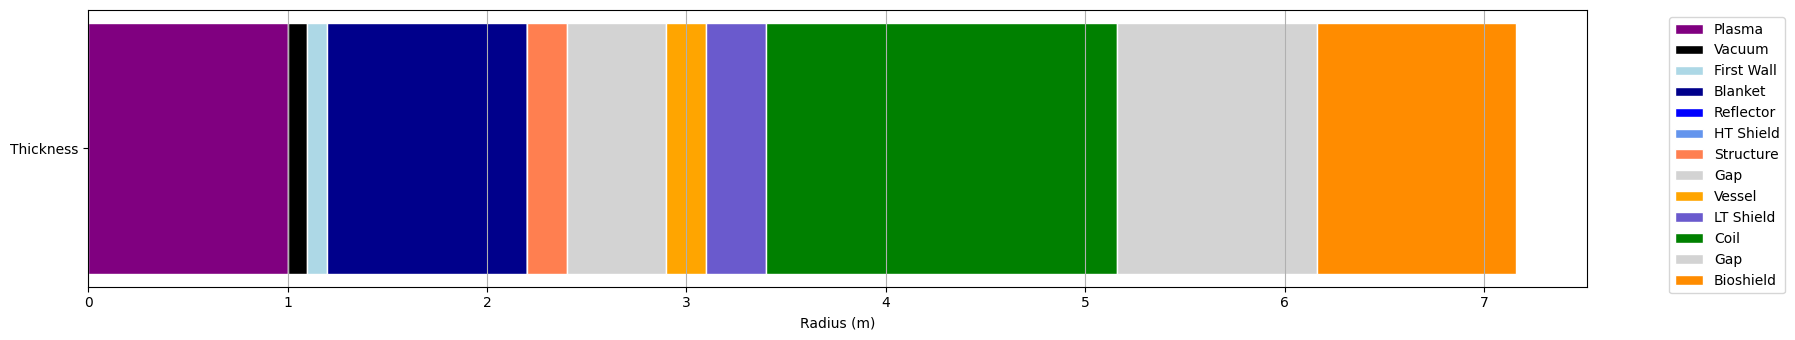

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220101_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220101_MIF_DT.tex.
Replaced 'C220101' with '60' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220101_MIF_DT.tex'.
Replaced 'RAD12I' with '4' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220101_MIF_DT.tex'.
Replaced 'RAD13I' with '6' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220101_MIF_DT.tex'.
Replaced 'RAD10I' with '6.3' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220101_MIF_DT.tex'.
Replaced 'RAD11I' with '3.5' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220101_MIF_DT.tex'.
Replaced 'RAD1I' with '2' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220101_MIF_DT.tex'.
Replaced 'RAD2I' with '1.2' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220101_MIF_DT.tex'.
Replaced 'RAD3I' wit

In [14]:
#Cost Category 22.1.1: Reactor Equipment

"""
CALCS
"""

# Radial build inputs
chamber_length=50
axis_t = 0
plasma_t = 1
vacuum_t = 0.1
firstwall_t = 0.1
blanket1_t = 1
reflector_t = 0
ht_shield_t = 0
structure_t = 0.2
gap1_t = 0.5
vessel_t = 0.2
coil_t = 1.76
gap2_t = 1
lt_shield_t = 0.3
bioshield_t = 1


# Inner radii
axis_ir = axis_t
plasma_ir = plasma_t
vacuum_ir = vacuum_t + plasma_t
firstwall_ir = vacuum_t + vacuum_ir
blanket1_ir = firstwall_ir + firstwall_t
reflector_ir = blanket1_ir + blanket1_t
ht_shield_ir = reflector_ir + reflector_t
structure_ir = ht_shield_ir + ht_shield_t
gap1_ir = structure_ir + structure_t
vessel_ir = gap1_ir + gap1_t
lt_shield_ir = vessel_ir + vessel_t  # Moved lt_shield here
coil_ir = lt_shield_ir + lt_shield_t  # Updated coil_ir calculation
gap2_ir = coil_ir + coil_t
bioshield_ir = gap2_ir + gap2_t  # Updated bioshield inner radius

# Outer radii
axis_or = axis_ir + axis_t
plasma_or = plasma_ir + plasma_t
vacuum_or = vacuum_ir + vacuum_t
firstwall_or = firstwall_ir + firstwall_t
blanket1_or = blanket1_ir + blanket1_t
reflector_or = reflector_ir + reflector_t
ht_shield_or = ht_shield_ir + ht_shield_t
structure_or = structure_ir + structure_t
gap1_or = gap1_ir + gap1_t
vessel_or = vessel_ir + vessel_t
lt_shield_or = lt_shield_ir + lt_shield_t  # Moved lt_shield here
coil_or = coil_ir + coil_t  # Updated coil_or calculation
gap2_or = gap2_ir + gap2_t
bioshield_or = bioshield_ir + bioshield_t  # Updated bioshield outer radius

# Volumes for cylinder
def calc_volume(inner, outer):
    return chamber_length * np.pi * (outer**2 - inner**2)

axis_vol = calc_volume(axis_ir, axis_or)
plasma_vol = calc_volume(plasma_ir, plasma_or)
vacuum_vol = calc_volume(vacuum_ir, vacuum_or)
firstwall_vol = calc_volume(firstwall_ir, firstwall_or)
blanket1_vol = calc_volume(blanket1_ir, blanket1_or)
reflector_vol = calc_volume(reflector_ir, reflector_or)
ht_shield_vol = calc_volume(ht_shield_ir, ht_shield_or)
structure_vol = calc_volume(structure_ir, structure_or)
gap1_vol = calc_volume(gap1_ir, gap1_or)
vessel_vol = calc_volume(vessel_ir, vessel_or)
lt_shield_vol = calc_volume(lt_shield_ir, lt_shield_or)  # Moved lt_shield volume here
coil_vol = calc_volume(coil_ir, coil_or)*(9*0.779)/40  # Updated coil volume calculation
gap2_vol = calc_volume(gap2_ir, gap2_or)
bioshield_vol = calc_volume(bioshield_ir, bioshield_or)  # Updated bioshield volume


#Cost calc 1

# Define the values
f_W = 1
C_OFW = 0
M_OFW = 0
# Blanket is rotating vortex of PbLi
FPCPPFbLi = 0.9
f_FS = 0.1
# Cost of blanket
C_OBI_PbLi = blanket1_vol * (materials["PbLi"]["rho"] * materials["PbLi"]["c"] * FPCPPFbLi)
C_OBI_FS = blanket1_vol * (materials["FS"]["rho"] * materials["FS"]["c_raw"] * f_FS)
# Total heat capacity of OBI
C_OBI = C_OBI_FS + C_OBI_PbLi
# Calculate C_22_1_1
C220101 = AM * N_mod * (C_OFW + C_OBI) / 1e6  # First Wall/Blanket/reflector

"""
PLOTTING RADIAL BUILD
"""

## The names of the sections
# Updated order of the sections
sections = ['Plasma', 'Vacuum', 'First Wall', 'Blanket', 'Reflector', 'HT Shield', 'Structure', 'Gap', 'Vessel', 'LT Shield', 'Coil', 'Gap', 'Bioshield']

# The thickness of each section (for stacked bar plot)
thickness = [plasma_t, vacuum_t, firstwall_t, blanket1_t, reflector_t, ht_shield_t, structure_t, gap1_t, vessel_t, lt_shield_t, coil_t, gap2_t, bioshield_t]

# Updated colors for each section
colors = ['purple', 'black', 'lightblue', 'darkblue', 'blue', 'cornflowerblue', 'coral', 'lightgray', 'orange', 'slateblue', 'green', 'lightgray', 'darkorange']

# Plotting the stacked bar graph
fig, ax = plt.subplots(figsize=(18, 3.5)) # Adjust the figsize to get the desired aspect ratio

# Adding each section to the bar plot
left = 0  # Initialize left at 0
for i, (section, thk) in enumerate(zip(sections, thickness)):
    ax.barh('Thickness', thk, left=left, color=colors[i], edgecolor='white', label=section)
    left += thk  # Increment left by the thickness of the current section

# Setting labels and title
ax.set_xlabel('Radius (m)')

# Creating the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for the x-axis
ax.xaxis.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Export as pdf
fig.savefig(os.path.join(figures_directory, 'radial_build.pdf'), bbox_inches='tight')



copy_file('CAS220101_MIF_DT.tex')
overwrite_variable('CAS220101_MIF_DT.tex', 'C220101', round(C220101))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD12I', round(coil_ir))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD13I', round(bioshield_ir))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD10I', round(gap2_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD11I', round(lt_shield_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD1I', round(plasma_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD2I', round(vacuum_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD3I', round(firstwall_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD4I', round(blanket1_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD5I', round(structure_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD6I', round(reflector_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD7I', round(gap1_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD8I', round(vessel_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD9I', round(ht_shield_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD12O', round(coil_or))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD13O', round(bioshield_or))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD10O', round(gap2_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD11O', round(lt_shield_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD1O', round(plasma_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD2O', round(vacuum_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD3O', round(firstwall_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD4O', round(blanket1_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD5O', round(structure_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD6O', round(reflector_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD7O', round(gap1_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD8O', round(vessel_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'RAD9O', round(ht_shield_or,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH10', round(gap2_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH11', round(lt_shield_t))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH12', round(coil_t))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH13', round(bioshield_t))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH1', round(plasma_t,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH2', round(vacuum_t,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH3', round(firstwall_t,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH4', round(blanket1_t,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH5', round(structure_t,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH6', round(reflector_t,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH7', round(gap1_t,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH8', round(vessel_t,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'TH9', round(ht_shield_t,1))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL10', round(gap2_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL11', round(lt_shield_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL12', round(coil_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL13', round(bioshield_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL1', round(plasma_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL2', round(vacuum_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL3', round(firstwall_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL4', round(blanket1_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL5', round(structure_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL6', round(reflector_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL7', round(gap1_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL8', round(vessel_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'VOL9', round(ht_shield_vol))
overwrite_variable('CAS220101_MIF_DT.tex', 'primaryC', primaryC)
overwrite_variable('CAS220101_MIF_DT.tex', 'secondaryC', secondaryC)
overwrite_variable('CAS220101_MIF_DT.tex', 'neutronM', neutronM)
overwrite_variable('CAS220101_MIF_DT.tex', 'structure1', structure1)
overwrite_variable('CAS220101_MIF_DT.tex', 'firstW', firstW)

In [15]:
#Cost Category 22.1.2: Shield

"""
CALCS
"""
# Define the fractions
f_SiC = 0.00
FPCPPFbLi = 0.1
f_W = 0.00
f_BFS = 0.9


reactor = 'CATF'

# Retrieve the volume of HTS from the reactor_volumes dictionary
#V_HTS = volumes["V_HTS"]
V_HTS = round(ht_shield_vol,1)

# Calculate the cost for HTS
C_HTS = round(V_HTS * (
    materials["SiC"]["rho"] * materials["SiC"]["c_raw"] * materials["SiC"]["m"] * f_SiC +
    materials["PbLi"]["rho"] * materials["PbLi"]["c"] * FPCPPFbLi +
    materials["W"]["rho"] * materials["W"]["c_raw"] * materials["W"]["m"] * f_W +
    materials["BFS"]["rho"] * materials["BFS"]["c_raw"] * materials["BFS"]["m"] * f_BFS
) / 1e6,1)

# Volume of HTShield that is BFS
V_HTS_BFS = V_HTS * f_BFS
# The cost C_22_1_2 is the same as C_HTS
C22010201 = round(C_HTS,1)
C22010202 = lt_shield_vol*materials["SS316"]["c_raw"]*materials["SS316"]["m"]/1e3
C22010203 = bioshield_vol*materials["SS316"]["c_raw"]*materials["SS316"]["m"]/1e3
C22010204 = C22010203*0.1
C220102 = C22010201+C22010202+C22010203+C22010204


copy_file('CAS220102_MIF_DT.tex')
overwrite_variable('CAS220102_MIF_DT.tex', 'C22010201', round(C22010201))
overwrite_variable('CAS220102_MIF_DT.tex', 'C22010202', round(C22010202))
overwrite_variable('CAS220102_MIF_DT.tex', 'C22010203', round(C22010203))
overwrite_variable('CAS220102_MIF_DT.tex', 'C22010204', round(C22010204))
overwrite_variable('CAS220102_MIF_DT.tex', 'C220102', round(C220102))

overwrite_variable('CAS220102_MIF_DT.tex', 'V220102', round(V_HTS))
overwrite_variable('CAS220102_MIF_DT.tex', 'primaryC', primaryC)
overwrite_variable('CAS220102_MIF_DT.tex', 'VOL9', round(ht_shield_vol))
overwrite_variable('CAS220102_MIF_DT.tex', 'VOL11', round(lt_shield_vol))


Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220102_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220102_MIF_DT.tex.
Replaced 'C22010201' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220102_MIF_DT.tex'.
Replaced 'C22010202' with '1' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220102_MIF_DT.tex'.
Replaced 'C22010203' with '8' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220102_MIF_DT.tex'.
Replaced 'C22010204' with '1' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220102_MIF_DT.tex'.
Replaced 'C220102' with '11' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220102_MIF_DT.tex'.
Replaced 'V220102' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220102_MIF_DT.tex'.
Replaced 'primaryC' with 'Lead Lithium (PbLi)' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220102_MIF_

In [16]:
#Cost Category 22.1.3: Coils



def magnets_all(cable_w, cable_h, tape_w, tape_t, j_tape, m_cost_YBCO, m_cost_ss, m_cost_cu,
                cu_density, ss_density, frac_cs_cu_yuhu, frac_cs_ss_yuhu, current_supply,
                j_cable, r_centre, z_centre, dr, dz, no_tf_coils, no_m1_coils, no_m2_coils, mfr_factor):

    vol_coil = round(2 * math.pi * dr * r_centre * dz, 3)  # volume of coil [m^3]
    cs_area = dr * dz  # cross-sectional area of the coil [m^2]
    turns_c = cs_area / (cable_w * cable_h)  # number of turns of cable
    cable_current = current_supply * 1e6 / turns_c  # current through each cable [A]
    turns_sc_s = round((j_cable / j_tape * cable_w * cable_h) / (tape_w * tape_t), 6)  # turns of sc in one cable
    turns_sc_tot = turns_sc_s * turns_c
    tape_length = round(turns_sc_tot * r_centre * 2 * math.pi, 3)/1e3  # length of rebco tape [km]
    critical_tapes = turns_sc_s
    tape_current = round(cable_current / turns_sc_s, 3)  # current through each tape [A]
    cost_SC = round(tape_current / 1e3 * tape_length*1e3 * m_cost_YBCO, 3)/1e6  # material cost of YBCO tape [m$]
    cost_cu = round(frac_cs_cu_yuhu * m_cost_cu * vol_coil * cu_density, 3)/1e6  # material cost of copper [m$]
    cost_ss = round(frac_cs_ss_yuhu * m_cost_ss * vol_coil * ss_density, 3)/1e6  # material cost of stainless steel [m$]
    tot_mat_cost = round(cost_SC + cost_cu + cost_ss, 3)  # total material cost [m$]
    mag_cost = round(tot_mat_cost * mfr_factor, 3)  # final magnet cost [m$]

    return {
        'vol_coil': vol_coil,
        'cs_area': cs_area,
        'turns_c': turns_c,
        'cable_current': cable_current,
        'turns_sc_s': turns_sc_s,
        'turns_sc_tot': turns_sc_tot,
        'tape_length': tape_length,
        'critical_tapes': critical_tapes,
        'tape_current': tape_current,
        'cost_SC': cost_SC,
        'cost_cu': cost_cu,
        'cost_ss': cost_ss,
        'tot_mat_cost': tot_mat_cost,
        'mag_cost': mag_cost
    }

# Constants
cable_w = 0.014  # Cable width in meters
cable_h = 0.017  # Cable height in meters
tape_w = 0.004  # Tape width in meters
tape_t = 0.00013  # Tape thickness in meters
j_tape = 150  # Current density of the tape in A/mm^2

m_cost_YBCO = 50  # Material cost of YBCO tape in $/kAm
m_cost_ss = 5  # Material cost of stainless steel in $/kg
m_cost_cu = 10.3  # Material cost of copper in $/kg
cu_density = 7900  # Density of copper in kg/m^3
ss_density = 7900  # Density of stainless steel in kg/m^3
mfr_factor = 3  # Manufacturing factor

frac_cs_cu_yuhu = 0.307  # Fractional cross-sectional area of copper in Yuhu Zhai's cable design
frac_cs_ss_yuhu = 0.257  # Fractional cross-sectional area of stainless steel in Yuhu Zhai's cable design
tot_cs_area_yuhu = 0.000238  # Total cross-sectional area of Yuhu Zhai's cable design in m^2

# Inputs for the magnets
current_supply_list = [19.576, 19.576, 19.576]
j_cable_list = [22.4, 22.4, 22.4]
r_centre_list = [5.05, 2.95, 1.5]
z_centre_list = [0, 0, 0]
dr_list = [0.779, 1.46, 1.46]
dz_list = [0.779, 1.46, 1.46]
struct_factor = 0.25  # Structural multiplication factor

# Number of coils
no_s_coils = 9
no_m1_coils = 2
no_m2_coils = 2

mag_costs=[]
all_magnet_properties = {}
for i, current_supply in enumerate(current_supply_list):
    magnet_properties = magnets_all(cable_w, cable_h, tape_w, tape_t, j_tape, m_cost_YBCO, m_cost_ss, m_cost_cu,
                                    cu_density, ss_density, frac_cs_cu_yuhu, frac_cs_ss_yuhu, current_supply,
                                    j_cable_list[i], r_centre_list[i], z_centre_list[i], dr_list[i], dz_list[i],
                                    no_s_coils, no_m1_coils, no_m2_coils, mfr_factor)
    all_magnet_properties.update({f'magnet_{i+1}_{k}': v for k, v in magnet_properties.items()})
    mag_costs.append(magnet_properties['mag_cost'])

# Additional calculations based on mag_costs
sol_mag_cost=mag_costs[0]
m1_mag_cost=mag_costs[1]
m2_mag_cost=mag_costs[2]

sol_struct_cost= struct_factor*sol_mag_cost
m1_struct_cost= struct_factor*m1_mag_cost
m2_struct_cost= struct_factor*m2_mag_cost
tot_struct_cost= sol_struct_cost+m1_struct_cost+m2_struct_cost

tot_sol_cost_i = (sol_mag_cost+sol_struct_cost)
tot_m1_cost_i = (m1_mag_cost+m1_struct_cost)
tot_m2_cost_i = (m2_mag_cost+m2_struct_cost)

tot_sol_cost = (sol_mag_cost+sol_struct_cost)*no_s_coils
tot_m1_cost = (m1_mag_cost+m1_struct_cost)*no_m1_coils
tot_m2_cost = (m2_mag_cost+m2_struct_cost)*no_m2_coils



C22010301 = tot_sol_cost  # Assuming mag_costs[0] is for solenoid coils
C22010302 = tot_m1_cost  + tot_m2_cost # Assuming mag_costs[1] is for m1 coils
C22010303 = 0.05*C22010301+C22010302  # Assuming mag_costs[2] is for m2 coils
C22010304 = tot_struct_cost #
C220103 = C22010301 + C22010302 + C22010303



# Gathering all variables in a dictionary
variables_to_overwrite = {
    'cable_w': cable_w, 'cable_h': cable_h, 'tape_w': tape_w, 'tape_t': tape_t, 'j_tape': j_tape,
    'm_cost_YBCO': m_cost_YBCO, 'm_cost_ss': m_cost_ss, 'm_cost_cu': m_cost_cu,
    'cu_density': cu_density, 'ss_density': ss_density, 'mfr_factor': mfr_factor,
    'frac_cs_cu_yuhu': frac_cs_cu_yuhu, 'frac_cs_ss_yuhu': frac_cs_ss_yuhu,
    'struct_factor': struct_factor, 'no_s_coils': no_s_coils, 'no_m1_coils': no_m1_coils,
    'no_m2_coils': no_m2_coils, 'C22010301': C22010301, 'C22010302': C22010302,
    'C22010303': C22010303, 'C220103': C220103, 'C22010304': C22010304, 'sol_struct_cost':sol_struct_cost,
    'm1_struct_cost':m1_struct_cost, 'm2_struct_cost':m2_struct_cost, 'sol_mag_cost':sol_mag_cost, 'm1_mag_cost':m1_mag_cost,
    'm2_mag_cost':m2_mag_cost, 'tot_sol_cost_i':tot_sol_cost_i, 'tot_m1_cost_i':tot_m1_cost_i, 'tot_m2_cost_i':tot_m2_cost_i,
    'tot_sol_cost':tot_sol_cost, 'tot_m1_cost':tot_m1_cost, 'tot_m2_cost':tot_m2_cost
}

# Add calculated magnet properties with suffixes
for i in range(1, 4):  # Assuming 3 types of magnets
    magnet_properties = magnets_all(cable_w, cable_h, tape_w, tape_t, j_tape, m_cost_YBCO, m_cost_ss, m_cost_cu,
                                    cu_density, ss_density, frac_cs_cu_yuhu, frac_cs_ss_yuhu, current_supply_list[i-1],
                                    j_cable_list[i-1], r_centre_list[i-1], z_centre_list[i-1], dr_list[i-1], dz_list[i-1],
                                    no_s_coils, no_m1_coils, no_m2_coils, mfr_factor)
    for key, value in magnet_properties.items():
        variables_to_overwrite[f"{key}_{i}"] = value

# Overwrite each variable in the .tex file
copy_file('CAS220103_MCF_DT.tex')
for var_name, var_value in variables_to_overwrite.items():
    overwrite_variable('CAS220103_MCF_DT.tex', var_name, round(var_value))



"""
Overwriting input lists current supply, dz,dr etc
"""

def generate_variable_names(list_name, list_values):
    return {f"{list_name}_{i+1}": value for i, value in enumerate(list_values)}

def update_latex_values(*lists):
    for list_name, list_values in lists:
        vars_to_update = generate_variable_names(list_name, list_values)
        for var_name, var_value in vars_to_update.items():
            overwrite_variable('CAS220103_MCF_DT.tex', var_name, var_value)

# Updating the LaTeX document with new values
update_latex_values(
    ("current_supply", current_supply_list),
    ("j_cable", j_cable_list),
    ("r_centre", r_centre_list),
    ("z_centre", z_centre_list),
    ("dr", dr_list),
    ("dz", dz_list)
)

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220103_MCF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220103_MCF_DT.tex.
Replaced 'cable_w' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220103_MCF_DT.tex'.
Replaced 'cable_h' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220103_MCF_DT.tex'.
Replaced 'tape_w' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220103_MCF_DT.tex'.
Replaced 'tape_t' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220103_MCF_DT.tex'.
Replaced 'j_tape' with '150' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220103_MCF_DT.tex'.
Replaced 'm_cost_YBCO' with '50' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220103_MCF_DT.tex'.
Replaced 'm_cost_ss' with '5' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220103_MCF_DT.tex'.
Replaced 'm_c

In [17]:
#22.1.4 Supplementary heating

heating_refs = {
    "ARIES-AT": {"Type": "ICRF/LH", "Power (MW)": 37.441, "$/W (2009)": 1.67, "$/W (2023)": 2.3881},
    "ARIES-I": {"Type": "ICRF/LH", "Power (MW)": 96.707, "$/W (2009)": 1.87, "$/W (2023)": 2.6741},
    "ARIES-I'": {"Type": "ICRF/LH", "Power (MW)": 202.5, "$/W (2009)": 1.96, "$/W (2023)": 2.8028},
    "ARIES-RS": {"Type": "ICRF/LH/HFFW", "Power (MW)": 80.773, "$/W (2009)": 3.09, "$/W (2023)": 4.4187},
    "ARIES-IV": {"Type": "ICRF/LH", "Power (MW)": 68, "$/W (2009)": 4.35, "$/W (2023)": 6.2205},
    "ARIES-II": {"Type": "ICRF/LH", "Power (MW)": 66.1, "$/W (2009)": 4.47, "$/W (2023)": 6.3921},
    "ARIES-III'": {"Type": "NBI", "Power (MW)": 163.2, "$/W (2009)": 4.93, "$/W (2023)": 7.0499},
    "ARIES-III": {"Type": "NBI", "Power (MW)": 172, "$/W (2009)": 4.95, "$/W (2023)": 7.0785},
    "ITER": {"Type": "ICRF", "Power (MW)": 5.5, "$/W (2009)": None, "$/W (2023)": 7.865},
    "Average": {"Type": None, "Power (MW)": 110.840125, "$/W (2009)": 3.643333333, "$/W (2023)": 5.209966667},
    "Average (ICRF)": {"Type": None, "Power (MW)": 91.92016667, "$/W (2009)": 2.901666667, "$/W (2023)": 4.149383333},
    "Average (NBI)": {"Type": None, "Power (MW)": 167.6, "$/W (2009)": 4.94, "$/W (2023)": 7.0642},
}

NBIpower = 25 #MW
C22010401= heating_refs["Average (NBI)"]["$/W (2023)"]*NBIpower

ICRFpower = 25 #MW
C22010402= heating_refs["Average (ICRF)"]["$/W (2023)"]*ICRFpower

C220104 = C22010401+C22010402
copy_file('CAS220104_MIF_DT.tex')
overwrite_variable('CAS220104_MIF_DT.tex', 'C22010401', round(C22010401,3))
overwrite_variable('CAS220104_MIF_DT.tex', 'C22010402', round(C22010402,3))
overwrite_variable('CAS220104_MIF_DT.tex', 'C220104', round(C220104,3))
overwrite_variable('CAS220104_MIF_DT.tex', 'NBIpower', round(NBIpower,3))
overwrite_variable('CAS220104_MIF_DT.tex', 'ICRFpower', round(ICRFpower,3))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220104_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220104_MIF_DT.tex.
Replaced 'C22010401' with '176.605' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220104_MIF_DT.tex'.
Replaced 'C22010402' with '103.735' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220104_MIF_DT.tex'.
Replaced 'C220104' with '280.34' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220104_MIF_DT.tex'.
Replaced 'NBIpower' with '25' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220104_MIF_DT.tex'.
Replaced 'ICRFpower' with '25' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220104_MIF_DT.tex'.


In [18]:
#22.1.5 primary structure
#Included in vacuum for this system
C220105=0
copy_file('CAS220105_MIF.tex')
overwrite_variable('CAS220105_MIF.tex', 'C220105', round(C220105,3))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220105_MIF.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220105_MIF.tex.
Replaced 'C220105' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220105_MIF.tex'.


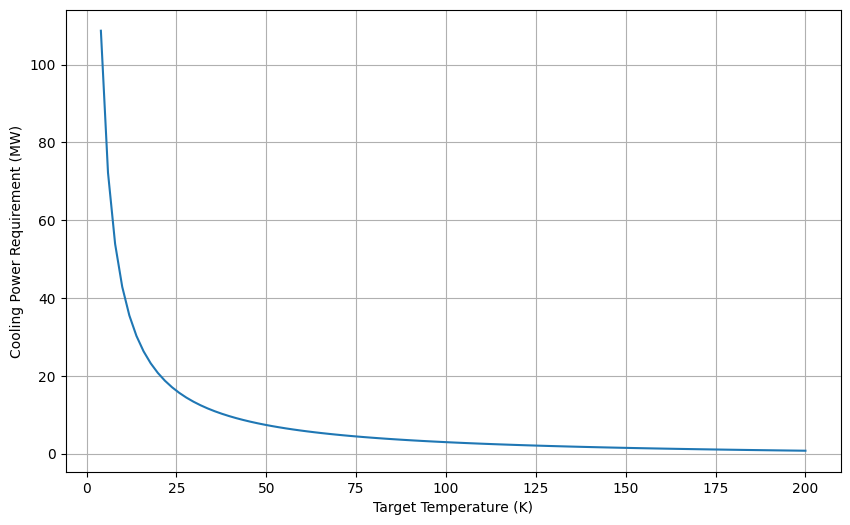

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220106_MIF.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220106_MIF.tex.
Replaced 'C22010601' with '9' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220106_MIF.tex'.
Replaced 'C22010602' with '9' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220106_MIF.tex'.
Replaced 'C22010603' with '23' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220106_MIF.tex'.
Replaced 'C22010604' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220106_MIF.tex'.
Replaced 'C220106' with '37' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220106_MIF.tex'.
Replaced 'vesvol' with '2404' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220106_MIF.tex'.
Replaced 'materialvolume' with '28' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220106_MIF.tex'.
Replaced 'massstruct' with

In [19]:
##22.1.6 Vacuum system
#22.1.6.1 Vacuum Vessel
import cadquery as cq

# Parameters
middle_length = chamber_length  # Middle part length in meters
middle_diameter = 2*vessel_ir  # Middle part diameter in meters
end_length = 8  # End parts length in meters (each)
end_diameter = 3*vessel_ir  # End parts diameter in meters
fillet_radius = 0.002 * middle_length  # Fillet radius in meters, adjust as necessary
thickness = 0.02  # Thickness in meters

# Create the middle cylinder
middle_cylinder = cq.Workplane("XY").cylinder(middle_length, middle_diameter / 2)

# Create the end cylinders and translate them into position
end_cylinder1 = cq.Workplane("XY").cylinder(end_length, end_diameter / 2).translate((0, 0, middle_length / 2 + end_length / 2))
end_cylinder2 = cq.Workplane("XY").cylinder(end_length, end_diameter / 2).translate((0, 0, -(middle_length / 2 + end_length / 2)))

# Combine the middle cylinder with the end cylinders for outer shape
combined_outer_shape = middle_cylinder.union(end_cylinder1).union(end_cylinder2)

# Create an inner middle cylinder with a smaller diameter to represent the thickness
inner_middle_cylinder = cq.Workplane("XY").cylinder(middle_length, middle_diameter / 2 - thickness)

# Create inner end cylinders with the reduced diameter and translate them into position
inner_end_cylinder1 = cq.Workplane("XY").cylinder(end_length, end_diameter / 2 - thickness).translate((0, 0, middle_length / 2 + end_length / 2))
inner_end_cylinder2 = cq.Workplane("XY").cylinder(end_length, end_diameter / 2 - thickness).translate((0, 0, -(middle_length / 2 + end_length / 2)))

# Combine the inner middle cylinder with the inner end cylinders for inner shape
combined_inner_shape = inner_middle_cylinder.union(inner_end_cylinder1).union(inner_end_cylinder2)
vesvol=combined_inner_shape.val().Volume()


# Subtract the combined inner shape from the outer shape for material volume calculation
material_shape = combined_outer_shape.cut(combined_inner_shape)

# Calculate the material volume
materialvolume = material_shape.val().Volume()

# Now apply the fillets to the outer shape (for display purposes)
final_shape_with_fillets = combined_outer_shape.edges().fillet(fillet_radius)

# Material properties (density and cost)
ss_density = 6700  # kg/m^3
ss_cost = 5  # $/kg

# Calculate mass and cost
vesmfr = 10
massstruct = materialvolume * ss_density
vesmatcost = ss_cost * massstruct
C22010601 = vesmatcost*vesmfr/1e6

# Display the final shape
#display(final_shape_with_fillets)

#COOLING 22.1.6.2
def k_steel(T):
    return 10

T_mag = 20
T_env = 300


#Power in from thermal conduction through support
def Qin_struct(no_beams, beam_cs_area, beam_length,k):
    return k*beam_cs_area*no_beams/beam_length *(T_env-T_mag)/1e6


#power in from neutron flux, assume 95% is abosrbed in the blanket
def Qin_n():
    return PNEUTRON*0.05/1e6

#cooling from power in/half carnot COP
C_frac=0.1
def Q_cooling(Qin,C_frac):
    COP = T_mag/(T_env-T_mag)*C_frac #Assume 10% of carnot efficiency
    return Qin/COP, COP


#For 1 coil, assume 20 support beams, 5m length, 0.5m^2 cs area, target temp of 20K, env temp of 300 K
Qin = Qin_struct(20, 1, 5,k_steel((T_env+T_mag)/2))+Qin_n()

def Qin_tot(Qin,no_coils):
    return Qin * no_coils


#Cooling power requirements for various temperature differences
# Generate a range of target temperatures from 20 K to 300 K
T_mag_range = np.linspace(4, 200, 100)  # Target temperatures

# Calculating cooling power requirement for different target temperatures
cooling_power_requirements = Qin_tot(Qin,13) / (T_mag_range / (T_env - T_mag_range)*C_frac
)
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting on the axes
ax.plot(T_mag_range, cooling_power_requirements)
ax.set_xlabel('Target Temperature (K)')
ax.set_ylabel('Cooling Power Requirement (MW)')
# ax.set_title('Cooling Power Requirement vs. Target Temperature')
ax.grid(True)

# Display the plot
plt.show()

# Export as PDF
fig.savefig(os.path.join(figures_directory, 'cooling_efficiency.pdf'), bbox_inches='tight')

#Scaling cooling costs from STARFIRE see pg40 https://cer.ucsd.edu/_files/publications/UCSD-CER-13-01.pdf
#Starfire COP
COP_starfire = 4.2 / (300 - 4.2)*0.15
#STARFIRE cooling at 4.2 K
QSCItarfire = 20e3 #20 kW
#Calculating starfire cooling at system operating temp in MW
Q_cooling_temp = QSCItarfire * (Q_cooling(Qin,C_frac)[1]/ COP_starfire)/1e6

cost_starfire = 17.65*1.43 #17.65 M USD in 2009 for 20kW at 4.2 K, adjusted to inflation
C22010602 = Qin/Q_cooling_temp *17.65*1.43 #M USD, scaled to system size, at system temperature, from the 20 kW cooling, 17.65 STARFIRE system

#VACUUM PUMPING 22.1.6.3
#assume 1 second vac rate
#cost of 1 vacuum pump, scaled from 1985 dollars
cost_pump = 40000
#48 pumps needed for 200^3 system
vpump_cap = 200/48 #m^3 capable of beign pumped by 1 pump
no_vpumps = int(vesvol/vpump_cap)#Number of vacuum pumps required to pump the full vacuum in 1 second
C22010603  = no_vpumps*cost_pump/1e6

#ROUGHING PUMP 22.1.6.4
#from STARFIRE, only 1 needed
C22010604 = 120000*2.85/1e6


C220106 = C22010601  +C22010602 +C22010603+C22010604
copy_file('CAS220106_MIF.tex')
overwrite_variable('CAS220106_MIF.tex', 'C22010601', round(C22010601))
overwrite_variable('CAS220106_MIF.tex', 'C22010602', round(C22010601))
overwrite_variable('CAS220106_MIF.tex', 'C22010603', round(C22010603))
overwrite_variable('CAS220106_MIF.tex', 'C22010604', round(C22010604))
overwrite_variable('CAS220106_MIF.tex', 'C220106', round(C220106))
overwrite_variable('CAS220106_MIF.tex', 'vesvol', round(vesvol))
overwrite_variable('CAS220106_MIF.tex', 'materialvolume', round(materialvolume))
overwrite_variable('CAS220106_MIF.tex', 'massstruct', round(massstruct))
overwrite_variable('CAS220106_MIF.tex', 'vesmatcost', round(vesmatcost/1e6,1))
overwrite_variable('CAS220106_MIF.tex', 'vesmfr', round(vesmfr))
overwrite_variable('CAS220106_MIF.tex', 'Qin', round(Qin,2))

In [20]:
#Cost Category 22.1.7 Power supplies


#Scaled relative to ITER for a 500MW fusion power system
C220107 = 269 * PET/500

copy_file('CAS220107_MIF.tex')
overwrite_variable('CAS220107_MIF.tex', 'C220107', round(C220107))
overwrite_variable('CAS220107_MIF.tex', 'PNRL', round(PNRL))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220107_MIF.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220107_MIF.tex.
Replaced 'C220107' with '907' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220107_MIF.tex'.
Replaced 'PNRL' with '2500' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220107_MIF.tex'.


In [21]:
#22.1.8 Divertor
C220108 = 0
copy_file('CAS220108_MIF.tex')
overwrite_variable('CAS220108_MIF.tex', 'C220108', round(C220108))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220108_MIF.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220108_MIF.tex.
Replaced 'C220108' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220108_MIF.tex'.


In [22]:
#22.1.9 Direct Energy Converter
import math
#Subsystem costs
de_costs = {
    "expandertank": 16,
    "expandercoilandneutrontrapcoil": 33,
    "convertoegatevalve": 0.1,
    "neutrontrapshielding": 1,
    "vacuumsystem": 16,
    "gridsystem": 27,
    "heatcollectionsystem": 6,
    "electricaleqpmt": 13,
    "costperunit": 112,
    "totaldeunitcost": 447,
    "engineering15percent": 67,
    "contingency15percent": 77,
    "totaldecost": 591
}

def de_scaling(syst_power, flux_lim, input_dict):
    scaled_dict = {}
    for key, value in input_dict.items():
        scaled_value = value * syst_power * (1 / math.sqrt(flux_lim)) ** 3
        scaled_dict[key] = scaled_value
    return scaled_dict

scaled_de_costs=de_scaling(1, 2, de_costs)
C220109 = scaled_de_costs['totaldecost']

"""
WRITE TO LATEX
"""
copy_file('CAS220109_MIF.tex')
# Iterate over the scaled_de_costs dictionary
for key, value in scaled_de_costs.items():
    # replace each value in the .tex file
    overwrite_variable('CAS220109_MIF.tex', key, round(value, 1))
overwrite_variable('CAS220109_MIF.tex', 'C220109', round(C220109))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220109_MIF.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220109_MIF.tex.
Replaced 'expandertank' with '5.7' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220109_MIF.tex'.
Replaced 'expandercoilandneutrontrapcoil' with '11.7' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220109_MIF.tex'.
Replaced 'convertoegatevalve' with '0.0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220109_MIF.tex'.
Replaced 'neutrontrapshielding' with '0.4' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220109_MIF.tex'.
Replaced 'vacuumsystem' with '5.7' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220109_MIF.tex'.
Replaced 'gridsystem' with '9.5' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220109_MIF.tex'.
Replaced 'heatcollectionsystem' with '2.1' in '/content/drive/MyDrive/2023ARPAECostin

In [23]:
#Cost Category 22.1.11 Installation costs

# Define labor rate
lr = 1600 / 1e6  # 1600 dollars per day for skilled labor

# Assuming 'r' (major radius of the system) and 'N_mod' (number of modules) are predefined
# Replace these with actual values or calculations as needed
r = 8  # replace with actual value for r
N_mod = 1  # replace with actual value for N_mod


# Calculations
constructionworker = 20 * r / 4
C_22_1_11_in = N_mod * constructionTime * (lr * 20 * 300)
C_22_1_11_1_in = N_mod * ((lr * 200 * constructionworker) + 0)  # 22.1 first wall blanket
C_22_1_11_2_in = N_mod * ((lr * 150 * constructionworker) + 0)  # 22.2 shield
C_22_1_11_3_in = N_mod * ((lr * 100 * constructionworker) + 0)  # coils
C_22_1_11_4_in = N_mod * ((lr * 30 * constructionworker) + 0)  # supplementary heating
C_22_1_11_5_in = N_mod * ((lr * 60 * constructionworker) + 0)  # primary structure
C_22_1_11_6_in = N_mod * ((lr * 200 * constructionworker) + 0)  # vacuum system
C_22_1_11_7_in = N_mod * ((lr * 400 * constructionworker) + 0)  # power supplies
C_22_1_11_8_in = 0  # guns
C_22_1_11_9_in = N_mod * ((lr * 200 * constructionworker) + 0)   # direct energy converter
C_22_1_11_10_in = 0  # ECRH

# Total cost calculations
C220111 = (C_22_1_11_in + C_22_1_11_1_in + C_22_1_11_2_in + C_22_1_11_3_in + C_22_1_11_4_in + C_22_1_11_5_in + C_22_1_11_6_in + C_22_1_11_7_in + C_22_1_11_8_in + C_22_1_11_9_in + C_22_1_11_10_in)

copy_file('CAS220111_MIF.tex')
overwrite_variable('CAS220111_MIF.tex', 'C220111', round(C220111))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220111_MIF.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220111_MIF.tex.
Replaced 'C220111' with '115' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220111_MIF.tex'.


In [24]:
#Cost category 22.1 total
C220100 = C220101 + C220102 + C220103 + C220104 + C220105 + C220106 + C220107 +  C220111

In [25]:
#MAIN AND SECONDARY COOLANT Cost Category 22.2
N_mod=1


#C_22_2_1  = 233.9 * (PTH/3500)^0.55; 	#Li(f), PbLi, He:                %Primary coolant(i):
C220201  = 268.5  * (N_mod * PTH/3500) * 1.71 #am assuming a linear scaling	%Li(f), PbLi, He:
#Primary coolant(i):  1.85 is due to inflation%the CPI scaling of 1.71 comes from:
#https://www.bls.gov/data/inflation_calculator.htm scaled relative to 1992 dollars (despite 2003 publication date)
C220201 = 166 * (N_mod * PNET/1000)  #this is the Sheffield cost for a 1GWe system
#C_22_2_1  = 75.0 * (PTH/3500)^0.55   	#OC, H2O(g)
C220202 = 40.6 * (PTH/3500)**0.55     #Intermediate coolant system
C220203  = 0
#75.0 * (PTH/3500)^0.55      Secondary coolant system

C220200=  round(C220201 + C220202 + C220203,1)             #Main heat-transfer system (NSSS):

copy_file('CAS220200_MCF_DT.tex')
overwrite_variable('CAS220200_MCF_DT.tex', 'C220200', round(C220200))
overwrite_variable('CAS220200_MCF_DT.tex', 'C220201', round(C220201))
overwrite_variable('CAS220200_MCF_DT.tex', 'C220202', round(C220202))
overwrite_variable('CAS220200_MCF_DT.tex', 'C220203', round(C220203))
overwrite_variable('CAS220200_MCF_DT.tex', 'primaryC', primaryC)
overwrite_variable('CAS220200_MCF_DT.tex', 'secondaryC', secondaryC)

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220200_MCF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220200_MCF_DT.tex.
Replaced 'C220200' with '280' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220200_MCF_DT.tex'.
Replaced 'C220201' with '246' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220200_MCF_DT.tex'.
Replaced 'C220202' with '34' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220200_MCF_DT.tex'.
Replaced 'C220203' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220200_MCF_DT.tex'.
Replaced 'primaryC' with 'Lead Lithium (PbLi)' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220200_MCF_DT.tex'.
Replaced 'secondaryC' with 'water' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220200_MCF_DT.tex'.


In [26]:
#Cost Category 22.3  Auxiliary cooling


C220300    = round(1.10 * 1e-3 * N_mod * PTH * 2.02,1)          #Auxiliary cooling systems %the CPI scaling of 2.02 comes from: https://www.bls.gov/data/inflation_calculator.htm scaled relative to 1992 dollars (despite 2003 publication date)

copy_file('CAS220300_MCF_DT.tex')
overwrite_variable('CAS220300_MCF_DT.tex', 'C220300', round(C220300,1))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220300_MCF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220300_MCF_DT.tex.
Replaced 'C220300' with '5.6' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220300_MCF_DT.tex'.


In [27]:
#Cost Category 22.4 Radwaste

C220400    = round(1.96 * 1e-3 * PTH * 2.02  ,1)     	#Radioactive waste treatment %the CPI scaling of 1.96 comes from: https://www.bls.gov/data/inflation_calculator.htm scaled relative to 1992 dollars (despite 2003 publication date)

copy_file('CAS220400_MIF_DT.tex')
overwrite_variable('CAS220400_MIF_DT.tex', 'C220400', C220400)

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220400_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220400_MIF_DT.tex.
Replaced 'C220400' with '10.0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220400_MIF_DT.tex'.


In [28]:
#Cost Category 22.5 Fuel Handling and Storage


inflation = 1.43
C2205010ITER = 20.465*inflation
C2205020ITER = 7*inflation
C2205030ITER = 22.511*inflation
C2205040ITER = 9.76*inflation
C2205050ITER = 22.826*inflation
C2205060ITER = 47.542*inflation
C22050ITER = C2205010ITER+C2205020ITER+C2205030ITER+C2205040ITER+C2205050ITER+C2205060ITER #ITER inflation cost


lcredit = 0.8 #%learning curve
ltoak = 10 ** (math.log10(lcredit) / math.log10(2))


C220501 = C2205010ITER*ltoak
C220502 = C2205020ITER*ltoak
C220503 = C2205030ITER*ltoak
C220504 = C2205040ITER*ltoak
C220505 = C2205050ITER*ltoak
C220506 = C2205060ITER*ltoak
C220500 = C220501+C220502+C220503+C220504+C220505+C220506 #ITER inflation cost

variable_dictionary = {
    "lcredit": lcredit, "ltoak": ltoak, "C2205010ITER": C2205010ITER, "C2205020ITER": C2205020ITER,
    "C2205030ITER": C2205030ITER, "C2205040ITER": C2205040ITER, "C2205050ITER": C2205050ITER,
    "C2205060ITER": C2205060ITER, "C22050ITER": C22050ITER, "C220501": C220501, "C220502": C220502,
    "C220503": C220503, "C220504": C220504, "C220505": C220505, "C220506": C220506, "C220500": C220500
}

# Copying the .tex file
copy_file('CAS220500_MIF_DT.tex')
# Overwriting the placeholders in the .tex file
for var_name, var_value in variable_dictionary.items():
    overwrite_variable('CAS220500_MIF_DT.tex', var_name, round(var_value,1))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220500_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220500_MIF_DT.tex.
Replaced 'lcredit' with '0.8' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220500_MIF_DT.tex'.
Replaced 'ltoak' with '0.5' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220500_MIF_DT.tex'.
Replaced 'C2205010ITER' with '29.3' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220500_MIF_DT.tex'.
Replaced 'C2205020ITER' with '10.0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220500_MIF_DT.tex'.
Replaced 'C2205030ITER' with '32.2' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220500_MIF_DT.tex'.
Replaced 'C2205040ITER' with '14.0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220500_MIF_DT.tex'.
Replaced 'C2205050ITER' with '32.6' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/

In [29]:
#Cost Category 22.6 Other Reactor Plant Equipment


C220600 = round(11.5*(PNET/1000)**(0.8),1) #from waganer

copy_file('CAS220600_MCF_DT.tex')
overwrite_variable('CAS220600_MCF_DT.tex', 'C220600', round(C220600))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220600_MCF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220600_MCF_DT.tex.
Replaced 'C220600' with '16' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220600_MCF_DT.tex'.


In [30]:
#Cost Category 22.7 Instrumentation and Control

# 22.07.00.00    instrumentation & control(i&c)
C220700 = 85

copy_file('CAS220700_MCF_DT.tex')
overwrite_variable('CAS220700_MCF_DT.tex', 'C220700', round(C220700))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220700_MCF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220700_MCF_DT.tex.
Replaced 'C220700' with '85' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220700_MCF_DT.tex'.


In [31]:
#Reactor Plant Equipment (RPE) total
C220000 = C220100 + C220200 + C220300 + C220400 + C220500 + C220600 + C220700
copy_file('CAS220000_MIF_DT.tex')
overwrite_variable('CAS220000_MIF_DT.tex', 'C220000', C220000)

variables_to_overwrite = {'BFSrho': materials['BFS']['rho'], 'BFScraw': materials['BFS']['c_raw'], 'BFSm': materials['BFS']['m'],
    'FSrho': materials['FS']['rho'], 'FScraw': materials['FS']['c_raw'], 'FSm': materials['FS']['m'],
    'FSsigma': materials['FS']['sigma'],
    'Li4SiO4rho': materials['Li4SiO4']['rho'], 'Li4SiO4craw': materials['Li4SiO4']['c_raw'],
    'Li4SiO4m': materials['Li4SiO4']['m'], 'Fliberho': materials['Flibe']['rho'], 'Flibec': materials['Flibe']['c'],
    'Wrho': materials['W']['rho'], 'Wcraw': materials['W']['c_raw'], 'Wm': materials['W']['m'],
    'SiCrho': materials['SiC']['rho'], 'SiCcraw': materials['SiC']['c_raw'], 'SiCm': materials['SiC']['m'],
    'Inconelrho': materials['Inconel']['rho'], 'Inconelcraw': materials['Inconel']['c_raw'], 'Inconelm': materials['Inconel']['m'],
    'Curho': materials['Cu']['rho'], 'Cucraw': materials['Cu']['c_raw'], 'Cum': materials['Cu']['m'],
    'Polyimiderho': materials['Polyimide']['rho'], 'Polyimidecraw': materials['Polyimide']['c_raw'], 'Polyimidem': materials['Polyimide']['m'],
    'YBCOrho': materials['YBCO']['rho'], 'YBCOc': materials['YBCO']['c'], 'Concreterho': materials['Concrete']['rho'],
    'Concretecraw': materials['Concrete']['c_raw'], 'Concretem': materials['Concrete']['m'],
    'SS316rho': materials['SS316']['rho'], 'SS316craw': materials['SS316']['c_raw'], 'SS316m': materials['SS316']['m'],
    'SS316sigma': materials['SS316']['sigma'], 'Nb3Snc': materials['Nb3Sn']['c'], 'Incoloyrho': materials['Incoloy']['rho'],
    'Incoloycraw': materials['Incoloy']['c_raw'], 'Incoloym': materials['Incoloy']['m'],'Pbrho': materials['Pb']['rho'], 'Pbcraw': materials['Pb']['c_raw'],
    'Pbm': materials['Pb']['m'],"PbLirho":materials["PbLi"]["rho"],"PbLic":materials["PbLi"]["c"],'Lirho': materials['Li']['rho'], 'Licraw': materials['Li']['c_raw'], 'Lim': materials['Li']['m']
}


for var_name, var_value in variables_to_overwrite.items():
    overwrite_variable('CAS220000_MIF_DT.tex', var_name, round(var_value,2))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS220000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220000_MIF_DT.tex.
Replaced 'C220000' with '3461.443929055941' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220000_MIF_DT.tex'.
Replaced 'BFSrho' with '7800' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220000_MIF_DT.tex'.
Replaced 'BFScraw' with '30' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220000_MIF_DT.tex'.
Replaced 'BFSm' with '2' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220000_MIF_DT.tex'.
Replaced 'FSrho' with '7470' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220000_MIF_DT.tex'.
Replaced 'FScraw' with '10' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220000_MIF_DT.tex'.
Replaced 'FSm' with '3' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS220000_MIF_DT.tex'.
Replac

In [32]:
#Cost Category 23 Turbine Plant Equipment


C230000=round(N_mod * PET * 0.219 *1.15,1)

copy_file('CAS230000_MIF_DT.tex')
overwrite_variable('CAS230000_MIF_DT.tex', 'C230000', round(C230000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS230000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS230000_MIF_DT.tex.
Replaced 'C230000' with '425' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS230000_MIF_DT.tex'.


In [33]:
#Cost Category 24 Electric Plant Equipment

C240000= round(N_mod * PET * 0.054 * 1.15,1)

copy_file('CAS240000_MIF_DT.tex')
overwrite_variable('CAS240000_MIF_DT.tex', 'C240000', round(C240000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS240000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS240000_MIF_DT.tex.
Replaced 'C240000' with '105' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS240000_MIF_DT.tex'.


In [34]:
#Cost Category 25 Miscellaneous Plant Equipment

C250000  = round( N_mod* PET  * 0.038 * 1.15,1)   #factor of 1.15 obtained from escalating relative to 2019 $

copy_file('CAS250000_MIF_DT.tex')
overwrite_variable('CAS250000_MIF_DT.tex', 'C250000', round(C250000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS250000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS250000_MIF_DT.tex.
Replaced 'C250000' with '74' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS250000_MIF_DT.tex'.


In [35]:
#Cost Category 26 Heat Rejection

C260000 = round(N_mod * PNET * 0.107 * 1.15,1) #heat rejection scaled as NET electric power escalated relative to 2019 dollars to 2026 dollars

copy_file('CAS260000_MIF_DT.tex')
overwrite_variable('CAS260000_MIF_DT.tex', 'C260000', round(C260000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS260000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS260000_MIF_DT.tex.
Replaced 'C260000' with '182' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS260000_MIF_DT.tex'.


In [36]:
#Cost Category 27 Special Materials

# Assuming the values for c_Flibe, c_Pb, c_Li, and MLM are defined elsewhere in your code
# Replace 'value_x' with actual values
#c_Flibe = value_x  # replace value_x with actual value for c_Flibe
#c_Pb = value_y     # replace value_y with actual value for c_Pb
#c_Li = value_z     # replace value_z with actual value for c_Li
#MLM = value_a      # replace value_a with actual value for MLM

# Define the primary coolants list
primary_coolant = ["Lead Lithium (PbLi)", "Lithium (Li)", "FLiBe", "other eutectic salt", "helium", "dual coolant: PbLi and He", "water"]

# Select the first coolant
primaryC = primary_coolant[1]

# Select the coolant and calculate C_27_1
if primaryC == 'FLiBe':
    C_27_1 = 1000 * 2130 * c_Flibe / 1e6
elif primaryC == 'Lead Lithium (PbLi)':
    f_6Li = 0.1
    FPCPPFb = 0.9
    C_27_1 = (c_Pb * FPCPPFb * MLM * 1000 + c_Li * f_6Li * MLM * 1000) / 1e6
elif primaryC == 'Lithium (Li)':
    C_27_1 = 1000 * 2130 * 50 / 1e6
elif primaryC == 'other eutectic salt':
    C_27_1 = 1000 * 2130 * 50 / 1e6
elif primaryC == 'helium':
    C_27_1 = 1000 * 2.13 * 50 / 1e6
elif primaryC == 'dual coolant: PbLi and He':
    C_27_1 = 1000 * 2.13 * 50 / 1e6
elif primaryC == 'water':
    C_27_1 = 1000 * 1000 * 1 / 1e6

# Additional calculations
C_27_4 = 0.41 * 1.71  # Other
C_27_5 = 0.21 * 1.71  # Reactor-building cover gas
C270000 = round(C_27_1 + C_27_4 + C_27_5,1)

copy_file('CAS270000_MIF_DT.tex')
overwrite_variable('CAS270000_MIF_DT.tex', 'C270000', round(C270000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS270000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS270000_MIF_DT.tex.
Replaced 'C270000' with '108' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS270000_MIF_DT.tex'.


In [37]:
#cost category 28 Digital Twin

C280000=5

copy_file('CAS280000_MIF_DT.tex')
overwrite_variable('CAS280000_MIF_DT.tex', 'C280000', round(C280000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS280000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS280000_MIF_DT.tex.
Replaced 'C280000' with '5' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS280000_MIF_DT.tex'.


In [38]:
#Cost Category 29 Contingency


C290000= 0.1 * round(C210000 + C220000 + C230000 + C240000 + C280000 + C280000,1)

copy_file('CAS290000_MIF_DT.tex')
overwrite_variable('CAS290000_MIF_DT.tex', 'C290000', round(C290000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS290000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS290000_MIF_DT.tex.
Replaced 'C290000' with '487' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS290000_MIF_DT.tex'.


In [39]:
C200000 = C210000+C210000 + C220000 + C230000 + C240000 + C280000 + C280000 + C290000
copy_file('CAS200000_MIF_DT.tex')
overwrite_variable('CAS200000_MIF_DT.tex', 'C200000', round(C200000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS200000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS200000_MIF_DT.tex.
Replaced 'C200000' with '6235' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS200000_MIF_DT.tex'.


# Indirect Costs

In [40]:
#Cost Category 30 Capitalized Indirect Service Costs (CISC)

# Define LSA
LSA = 2

# Indirect Cost Factors for different LSA levels
fac_91 = [0.1130, 0.1200, 0.1280, 0.1510]  # x TDC [90]
fac_92 = [0.0520, 0.0520, 0.0520, 0.0520]  # x TDC [90]
fac_93 = [0.0520, 0.0600, 0.0640, 0.0870]  # x TDC [90]
fac_94 = [0.1826, 0.1848, 0.1866, 0.1935]  # applies only to C90, x TDC [90+91+92+93]
fac_95 = [0.0000, 0.0000, 0.0000, 0.0000]  # x TDC [90+91+92+93+94]
fac_96 = [0.2050, 0.2391, 0.2565, 0.2808]  # applied only to C90, x TDC [90+91+92+93+94]
fac_97 = [0.2651, 0.2736, 0.2787, 0.2915]  # applied only to C90, x TDC [90+91+92+93+94+95+96]
fac_98 = [0.0000, 0.0000, 0.0000, 0.0000]  # x TDC [90+91+92+93+94+95+96]


#Cost Category 31 – Field Indirect Costs - previously Cost Category 93

C310000LSA = fac_93[LSA - 1] * C200000
#0.060 * C_90; %N_mod*(/1e6)/A_power * A_C_93 #Field Office Engineering and Services  Table 3.2-VII of Ref. [1]

C310000 = (PNET/150)**-0.5 * PNET * 0.02 * constructionTime

#Cost Category 32  – Construction Supervision - previously Cost Category 91

C320000LSA = fac_91[LSA - 1] * C200000
C320000 = (PNET/150)**-0.5 * PNET * 0.05 * constructionTime #this takes the 316$/kW and divides by 6 to obtain a cost per year of 0.053$/MW and applies to PE, which is the net electric.  There are arguments that this should be applied to the gross electric, if we consider demonstration plants, but this code is not set up for FOAK currently.

#Cost Category 33 – Commissioning and Start-up Costs

#Cost Category 34 – Demonstration Test Run

#Cost Category 35 – Design Services Offsite

C350000 = (PNET/150)**-0.5 * PNET * 0.03 * constructionTime

C350000LSA = fac_92[LSA - 1] * C200000
#0.052 * C_90; %N_mod*(/1e6)/A_power * A_C_92; %Home Office Engineering and Services  Table 3.2-VII of Ref. [1]

C300000=C310000+C320000+C350000

copy_file('CAS300000_MIF_DT.tex')
overwrite_variable('CAS300000_MIF_DT.tex', 'constructionTime', constructionTime)
overwrite_variable('CAS300000_MIF_DT.tex', 'C300000', round(C300000))
overwrite_variable('CAS300000_MIF_DT.tex', 'C320000', round(C320000))
overwrite_variable('CAS300000_MIF_DT.tex', 'C310000LSA', round(C310000LSA))
overwrite_variable('CAS300000_MIF_DT.tex', 'C310000', round(C310000))
overwrite_variable('CAS300000_MIF_DT.tex', 'C350000LSA', round(C350000LSA))
overwrite_variable('CAS300000_MIF_DT.tex', 'C350000', round(C350000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS300000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS300000_MIF_DT.tex.
Replaced 'constructionTime' with '3' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS300000_MIF_DT.tex'.
Replaced 'C300000' with '141' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS300000_MIF_DT.tex'.
Replaced 'C320000' with '71' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS300000_MIF_DT.tex'.
Replaced 'C310000LSA' with '374' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS300000_MIF_DT.tex'.
Replaced 'C310000' with '28' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS300000_MIF_DT.tex'.
Replaced 'C350000LSA' with '324' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS300000_MIF_DT.tex'.
Replaced 'C350000' with '42' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS300000_MIF_DT.t

In [41]:
#Cost Category 40 Capitalized Owner’s Cost (COC)

C400000LSA = fac_91[LSA - 1] * C200000

C400000 =C400000LSA
#Cost Category 41 – Staff Recruitment and Training

C410000=0

#Cost Category 42 – Staff Housing

C420000=0

#Cost Category 43 – Staff Salary-Related Costs

C430000 = 0

#Cost Category 44 – Other Owner’s Costs

C440000 = 0

#C400000 = C410000 + C420000 + C430000 + C440000

copy_file('CAS400000_MIF_DT.tex')
overwrite_variable('CAS400000_MIF_DT.tex', 'C400000LSA', round(C400000LSA))
overwrite_variable('CAS400000_MIF_DT.tex', 'C400000', round(C400000))


Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS400000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS400000_MIF_DT.tex.
Replaced 'C400000LSA' with '748' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS400000_MIF_DT.tex'.
Replaced 'C400000' with '748' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS400000_MIF_DT.tex'.


In [42]:
#Cost Category 50 Capitalized Supplementary Costs (CSC)


#Cost Category 51 – Shipping and Transportation Costs

C510000 = 8

#Cost Category 52 – Spare Parts

C520000 = 0.1 * (C230000 + C240000 + C250000 + C260000 + C270000 + C280000)

#Cost Category 53 – Taxes

C530000 = 100

#Cost Category 54 – Insurance

C540000 = 1

#Cost Category 55 – Initial Fuel Load

#$22 M to $34 M (2016 USD) for a standard 150 MWe FPP.

C550000 = PNET/150 * 34

#Cost Category 58 – Decommissioning Costs

C580000 = 200

#Cost Category 59 – Contingency on Supplementary Costs

C590000 = 0.1 * (C580000 + C550000 + C540000 + C530000 + C520000 + C510000)

C500000 = C510000 + C520000 + C530000 + C540000 + C550000 + C580000 + C590000
''
copy_file('CAS500000_MIF_DT.tex')
overwrite_variable('CAS500000_MIF_DT.tex', 'C500000', round(C500000))
overwrite_variable('CAS500000_MIF_DT.tex', 'C510000', round(C510000))
overwrite_variable('CAS500000_MIF_DT.tex', 'C520000', round(C520000))
overwrite_variable('CAS500000_MIF_DT.tex', 'C530000', round(C530000))
overwrite_variable('CAS500000_MIF_DT.tex', 'C540000', round(C540000))
overwrite_variable('CAS500000_MIF_DT.tex', 'C550000', round(C550000))
overwrite_variable('CAS500000_MIF_DT.tex', 'C580000', round(C580000))
overwrite_variable('CAS500000_MIF_DT.tex', 'C590000', round(C590000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS500000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS500000_MIF_DT.tex.
Replaced 'C500000' with '808' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS500000_MIF_DT.tex'.
Replaced 'C510000' with '8' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS500000_MIF_DT.tex'.
Replaced 'C520000' with '90' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS500000_MIF_DT.tex'.
Replaced 'C530000' with '100' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS500000_MIF_DT.tex'.
Replaced 'C540000' with '1' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS500000_MIF_DT.tex'.
Replaced 'C550000' with '336' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS500000_MIF_DT.tex'.
Replaced 'C580000' with '200' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS500000_MIF_DT.tex'.
Replaced '

In [43]:
#Cost Category 60 Capitalized Financial Costs (CFC)

A_C_98 = 115
A_power = 1000

#Cost Category 61 – Escalation - formerly Cost Category 98: Escalation During Construction
C610000 = N_mod*(PNRL)/A_power * A_C_98 #Escalation during Construction (EDC) Table 3.2-X of Ref. [1]



# Cost Category 63 – Interest During Construction (IDC) formerly cost category 97
#for inflation rate = 0.05/y (cf. ARIES) and 0.02/y (lower and more modern).  The 0.05/y values check with Table 2.2-XVII p. 2-59 of the ARIES-II/IV report.
#Construction lead time is varied between 3 and 12 years. STARFIRE (with a published schedule) and ARIES used 6 years, which could be considered optimistic for a (big) tokamak.  We might be able to defend a lower base time for the smaller ARPA-E cases invoking factory fabrication and modularity (already assumed by STARFIRE).
#Your calculations so far have used the 6-yr f_IDC for 0.05/y inflation rate for Acct. 97; a sensitivity of TCC as a function of construction lead time is what we had in mind.
#f_EDC for constant-dollar costing is zero.  Nominal- (then-current dollar) costing includes f_EDC in Acct. 98.
#I am a bit surprised that the f_IDC for 0.02/y is slightly larger than the corresponding 0.05/y value.
#f_IDC - Interest During Construction for constant dollars
#f_EDC - Escalation During Construction
#a sensitivity of TCC as a function of construction lead time is what we had in mind

#yinf=  0.0500/y
#          			f_IDC(97)   	f_EDC(98)
#  con lead 	constant 	nominal 	nominal
#   3 		0.0863  	0.1624  	0.0951
#   4  		0.1118  	0.2119  	0.1394
#   5  		0.1381  	0.2637  	0.1887
#   6  		0.1652  	0.3178  	0.2436    <<<<
#   7  		0.1931  	0.3743  	0.3045
#   8  		0.2219  	0.4332  	0.3719
#   9  		0.2515  	0.4948  	0.4466
#  10  		0.2821  	0.5591  	0.5291
#  11  		0.3136  	0.6263  	0.6201
#  12  		0.3460  	0.6964  	0.7206

yearsconstr = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12];
costfac90 = [0.0863, 0.1118, 0.1381, 0.1652, 0.1931, 0.2219, 0.2515, 0.2821, 0.3136, 0.3460];

# yinf=  0.0200/y
#          f_IDC(97)   f_EDC(98)
#     constant nominal nominal
#   3  0.0863  0.1637  0.0376
#   4  0.1118  0.2144  0.0546
#   5  0.1381  0.2678  0.0733
#   6  0.1652  0.3239  0.0938
#   7  0.1931  0.3829  0.1162
#   8  0.2219  0.4450  0.1407
#   9  0.2515  0.5104  0.1675
#  10  0.2821  0.5792  0.1968
#  11  0.3136  0.6516  0.2288
#  12  0.3460  0.7279  0.2637

C630000LSA = fac_97[LSA - 1] * C200000

#C_97_sens = costfac90 * (C_90 + C_96 + C_94 + C_93 + C_92 + C_91);
#(/1e6)/A_power * A_C_97; %Interest during Construction (IDC)  Table 3.2-X of Ref. [1]

C630000 = PNET * 0.099 * constructionTime


C600000 = C630000 + C610000
copy_file('CAS600000_MIF_DT.tex')
overwrite_variable('CAS600000_MIF_DT.tex', 'C600000', round(C600000))
overwrite_variable('CAS600000_MIF_DT.tex', 'C610000', round(C610000))
overwrite_variable('CAS600000_MIF_DT.tex', 'C630000LSA', round(C630000LSA))
overwrite_variable('CAS600000_MIF_DT.tex', 'C630000', round(C630000))


Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS600000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS600000_MIF_DT.tex.
Replaced 'C600000' with '728' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS600000_MIF_DT.tex'.
Replaced 'C610000' with '288' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS600000_MIF_DT.tex'.
Replaced 'C630000LSA' with '1706' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS600000_MIF_DT.tex'.
Replaced 'C630000' with '440' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS600000_MIF_DT.tex'.


In [44]:
#Total Capital costs 99

C990000 = C100000 + C200000+ C300000 + C400000 + C500000 + C600000

In [45]:
#Cost Category  70 Annualized O\&M Cost (AOC)

C_OM = 60 * PNET * 1000

C750000 = 0.1 * (C220000)

C700000 = C_OM/1e6 + C750000

copy_file('CAS700000_MIF_DT.tex')
overwrite_variable('CAS700000_MIF_DT.tex', 'C700000', round(C700000))
overwrite_variable('CAS700000_MIF_DT.tex', 'C750000', round(C750000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS700000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS700000_MIF_DT.tex.
Replaced 'C700000' with '435' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS700000_MIF_DT.tex'.
Replaced 'C750000' with '346' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS700000_MIF_DT.tex'.


In [53]:
#Cost Category 80: Annualized Fuel Cost (AFC)

y=0.0245 #inflation at 2.45%
Y=6
p_a = 0.9 #plant availability factor in Miller 2003 was 0.76
C_F = 0.03 * (8760 * PNET*N_mod * p_a) / (1 + y )**Y #hours * power = MWh
C_F=50


m_D = 3.342*10**(-27) # (kg)
u_D = 2175 #Where u_D ($/kg) = 2175 ($/kg) from STARFIRE * 1.12345/0.42273 [GDP IPD ratio for 2019/1980]
C_F = N_mod * PNRL * 1e6 * 3600 * 8760 * u_D * m_D * p_a / (17.58 * 1.6021e-13)

C800000 = C_F/1e6
copy_file('CAS800000_MIF_DT.tex')
overwrite_variable('CAS800000_MIF_DT.tex', 'C800000', round(C800000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS800000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS800000_MIF_DT.tex.
Replaced 'C800000' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS800000_MIF_DT.tex'.


In [47]:
#Cost Category 90: Annualized Financial Costs (AFC)

f_cr = 0.09   #Capital return factor
C_AC= f_cr * C990000


C900000 = C_AC
copy_file('CAS900000_MIF_DT.tex')
overwrite_variable('CAS900000_MIF_DT.tex', 'C900000', round(C900000))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CAS900000_MIF_DT.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS900000_MIF_DT.tex.
Replaced 'C900000' with '801' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CAS900000_MIF_DT.tex'.


In [48]:
#LCOE

C1000000 = (C900000*1e6 + (C700000*1e6 + C800000*1e6) * (1 + y) ** Y) / (8760 * PNET * N_mod * p_a)
C2000000 = C1000000 / 10

copy_file('LCOE.tex')
overwrite_variable('LCOE.tex', 'C750000', round(C750000))
overwrite_variable('LCOE.tex', 'C1000000', round(C1000000))
overwrite_variable('LCOE.tex', 'C2000000', round(C2000000))
overwrite_variable('LCOE.tex', 'C900000', round(C900000))
overwrite_variable('LCOE.tex', 'C800000',round( C800000))
overwrite_variable('LCOE.tex', 'C700000', round(C700000))


Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/LCOE.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/LCOE.tex.
Replaced 'C750000' with '346' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/LCOE.tex'.
Replaced 'C1000000' with '112' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/LCOE.tex'.
Replaced 'C2000000' with '11' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/LCOE.tex'.
Replaced 'C900000' with '801' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/LCOE.tex'.
Replaced 'C800000' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/LCOE.tex'.
Replaced 'C700000' with '435' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/LCOE.tex'.


In [49]:
#Cost Table

cost_vals =[C100000,C200000,C210000, C220000, C220100, C220101, C220102, C220103, C220104, C220105, C220106,
    C220107, C220108, C220109, C220111, C220200, C220300, C220400, C220500, C220600, C220700, C220000,
    C230000, C240000, C250000, C260000, C270000,C280000,C290000,C300000,C400000,C500000,C600000,C990000

]
cost_vals = [round(val, 1) for val in cost_vals]

placeholders = [ "C100000","C200000","C210000", "C220000", "C220100", "C220101", "C220102", "C220103", "C220104", "C220105", "C220106",
    "C220107", "C220108", "C220109", "C220111", "C220200", "C220300", "C220400", "C220500", "C220600", "C220700","C220000",
    "C230000", "C240000", "C250000", "C260000", "C270000","C280000","C290000","C300000","C400000","C500000","C600000","C990000"]


# Values from the LaTeX table
percent_ARIES =  [ 0.24,None, 8.28, 27.77, 14.48, 1.12, 2.52, 2.29, 4.74, 0.83, 1.07, 1.60, 0.20, 0.00, None, 7.99, None,
    None, None, None, None, 7.57, 2.80, 1.74, 2.43, None, None, 2.43, 6.22, 2.69, 3.11, 9.58,100
]

#Percentages
percent_vals  =[C100000/C990000,C200000/C990000,C210000/C990000, C220000/C990000, C220100/C990000, C220101/C990000,
                 C220102/C990000, C220103/C990000, C220104/C990000, C220105/C990000, C220106/C990000,
                 C220107/C990000, C220108/C990000, C220109/C990000, C220111/C990000, C220200/C990000, C220300/C990000,
                 C220400/C990000, C220500/C990000, C220600/C990000, C220700/C990000,
                 C230000/C990000, C240000/C990000, C250000/C990000, C260000/C990000, C270000/C990000,
                 C280000/C990000,C290000/C990000,C300000/C990000,C400000/C990000,C500000/C990000,C600000/C990000,C990000/C990000

]
percent_vals = [round(val*100) for val in percent_vals]

percent_placeholders = [ "C100000pp","C200000pp","C210000pp", "C220000pp", "C220100pp", "C220101pp", "C220102pp", "C220103pp", "C220104pp", "C220105pp", "C220106pp",
    "C220107pp", "C220108pp", "C220109pp", "C220111pp", "C220200pp", "C220300pp", "C220400pp", "C220500pp", "C220600pp", "C220700pp","C220000pp",
    "C230000pp", "C240000pp", "C250000pp", "C260000pp", "C270000pp","C280000pp","C290000pp","C300000pp","C400000pp","C500000pp","C600000pp","C990000pp"
]



#MARS Values (TOAK), 1985, MI#RROR ADVANCED REACTOR STUDY ENGINEERING OVERVIEW,James D. GORDON. (2023 M USD )
"""
MARS_values = [
    14.25, 711.93, 4324.31, 202.92, 213.75, 1405.05, 288.71, 155.61, 19.95,
    180.69, 13.40, 64.98, 674.31, 143.07, 32.78, 130.82, 86.93, 70.68, 91.2,
    550.05, 783.75, 456.0, 94.62,356.0, 6740.82
]
"""

MARS_values = [
    14.25, 6803.56, 711.93, 4324.31, 0, 202.92, 213.75, 1405.05,
    288.71, 155.61, 19.95, 180.69, 13.40, 64.98, 0, 674.31, 143.07,
    32.78, 130.82, 86.93, 70.68, 783.75, 456.0, 94.62, 0, 356.0,
    0, 550.05, 0,0,0,0,7367.86
]

MARS_percentages_p = [
    "M10pp", "M20pp", "M21pp", "M22pp", "-", "M22.0101pp", "M22.0102pp", "M22.0103pp",
    "M22.0104pp", "M22.0105pp", "M22.0106pp", "M22.0107pp", "M22.0108pp", "M22.0109pp", "-",
    "M22.02pp", "M22.03pp", "M22.04pp", "M22.05pp", "M22.06pp", "M22.07pp", "M23pp", "M24pp",
    "M25pp", "-", "M26pp", "-", "M22.99pp", "-","-","-","-","100"
]





#Correspond to cost categories:
#[20, 21, 22, 22.0101, 22.0102, 22.0103, 22.0104, 22.0105, 22.0106, 22.0107, 22.0108, 22.0109, 22.02, 22.03, 22.04, 22.05, 22.06, 22.07, 22.98, 22.99, 23, 24, 25, 26]

#As a percentage
MARS_percentages=np.array(MARS_values)/(7367.86)*100
"""
#MARS percentage Placeholders
MARS_percentages_p=["M20pp", "M21pp", "M22pp", "M22.0101pp", "M22.0102pp", "M22.0103pp", "M22.0104pp", "M22.0105pp", "M22.0106pp", "M22.0107pp", "M22.0108pp", "M22.0109pp", "M22.02pp", "M22.03pp", "M22.04pp", "M22.05pp", "M22.06pp", "M22.07pp", "M22.98pp", "M22.99pp", "M23pp", "M24pp", "M25pp", "M26pp"]
"""
copy_file('CASstructure.tex')
for placeholder, cost_val in zip(percent_placeholders, percent_vals):
    overwrite_variable('CASstructure.tex', placeholder, round(cost_val,1))

for placeholder, cost_val in zip(placeholders, cost_vals):
    overwrite_variable('CASstructure.tex', placeholder, round(cost_val))

#for placeholder, percent in zip(placeholders, cost_vals):
 #   overwrite_variable('CASstructure.tex', placeholder, cost_val)

for placeholder, percent in zip(MARS_percentages_p, MARS_percentages):
    overwrite_variable('CASstructure.tex', placeholder, round(percent,1))

Copied /content/drive/MyDrive/2023ARPAECosting/CATF/Latex../Originals/CASstructure.tex to /content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CASstructure.tex.
Replaced 'C100000pp' with '3' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CASstructure.tex'.
Replaced 'C200000pp' with '70' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CASstructure.tex'.
Replaced 'C210000pp' with '10' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CASstructure.tex'.
Replaced 'C220000pp' with '39' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CASstructure.tex'.
Replaced 'C220100pp' with '33' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CASstructure.tex'.
Replaced 'C220101pp' with '1' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CASstructure.tex'.
Replaced 'C220102pp' with '0' in '/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/Modified/CASstructure.tex'.
Replaced 'C220103pp' with '18' in '/c

# Git Upload

In [54]:
#Commiting to git
#LATEX
# Define the list of filenames
file_names = ["CAS100000_MIF_DT","CAS200000_MIF_DT","CAS210000_MIF_DT","CAS220000_MIF_DT", "CAS220101_MIF_DT", "CAS220102_MIF_DT", "CAS220103_MCF_DT",
    "CAS220104_MIF_DT","CAS220105_MIF", "CAS220106_MIF", "CAS220107_MIF", "CAS220108_MIF","CAS220109_MIF",
    "CAS220111_MIF", "CAS220200_MCF_DT", "CAS220300_MCF_DT", "CAS220400_MIF_DT","CAS220500_MIF_DT",
    "CAS220600_MCF_DT", "CAS220700_MCF_DT", "CAS230000_MIF_DT", "CAS240000_MIF_DT",
    "CAS250000_MIF_DT", "CAS260000_MIF_DT", "CAS270000_MIF_DT", "CAS280000_MIF_DT",
    "CAS290000_MIF_DT","CAS300000_MIF_DT", "CAS400000_MIF_DT","CAS500000_MIF_DT","CAS600000_MIF_DT","CAS700000_MIF_DT","CAS800000_MIF_DT","CAS900000_MIF_DT",
    "powerTableMFEDTM","CASstructure","LCOE"]

# Copy each file
for file_name in file_names:
    source_file = f"{modified_directory}/{file_name}.tex"
    #destination_file = f"/content/{project}/{file_name}.tex"
    destination_file = f"/content../Originals_CATF/Modified/{file_name}.tex"

    !cp "{source_file}" "{destination_file}"

#FIGURES
# Define the list of filenames
figure_file_names = ['radial_build.pdf','cooling_efficiency.pdf']

# Copy each file
for file_name in figure_file_names:
    source_file = f"{figures_directory}/{file_name}"
    #destination_file = f"/content/{project}/{file_name}"
    destination_file = f"/content../Originals_CATF/{project}Figures/{file_name}"

    !cp "{source_file}" "{destination_file}"


# Add, commit, and push the files
!git add .
!git commit -m "Updated multiple tex and files"
!git push origin main

cp: cannot create regular file '/content../Originals_CATF/CATFFigures/radial_build.pdf': No such file or directory
cp: cannot create regular file '/content../Originals_CATF/CATFFigures/cooling_efficiency.pdf': No such file or directory
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


# Cost preview

In [51]:
from pylatex import Document, Section, Table, Tabular, NoEscape, Package,Subsection,Subsubsection, Command, Figure

# Assuming cost_vals is a list of calculated variables
# Initialize the PyLaTeX document
doc = Document()
doc.packages.append(Package('graphicx'))

with doc.create(Section('Cost Accounting Structure')):
    with doc.create(Table(position='h!')) as table:
        # Open resizebox before the tabular starts
        table.append(NoEscape(r'\resizebox{\textwidth}{!}{'))

        with table.create(Tabular('lcccc')) as tabular:
            tabular.add_hline()
            tabular.add_row('', 'Cost (M USD)' , '% of TCC' , 'MARS Cost (M USD)' , 'MARS \% of TCC')
            tabular.add_hline()

            # Define the rows for the table
            row_titles = [
                '10. Pre-construction', '20. Direct Costs', '21. Structures/Site',
                '22. Reactor Plant Equip.', '22.1 Reactor Equip.', '22.1.1 First Wall & Blanket',
                '22.1.2 High Temp. Shield', '22.1.3 Magnets', '22.1.4 Suppl. Heating', '22.1.5 Primary Structure',
                '22.1.6 Vacuum System', '22.1.7 Power Supplies', '22.1.8 Electrodes or Plasma Guns',
                '22.1.9 Direct E. Conv.', '22.1.11 Assembly and installation', '22.2 Main Heat Transfer',
                '22.3 Auxiliary Cooling', '22.4 Rad. Waste Treat.', '22.5 Fuel Processing',
                '22.6 Other plant equipment', '22.7 Instrumentation and control', '23. Turbine Plant Equip.',
                '24. Electric Plant Equip.', '25. Misc. Plant Equip.', '26. Heat Rejection', '27. Special Materials', '28. Digital Twin', '29. Contingency',
                '30. Capitalized Indirect Service Costs (CISC)', '40. Capitalized Owner’s Cost (COC)',
                '50. Capitalized Supplementary Costs (CSC)', '60. Capitalized Financial Costs (CFC)',
                ' Total Capital Cost:'
            ]


            # Combine row titles with cost values
            for title, cost, cost1, cost2, cost3 in zip(row_titles, cost_vals, percent_vals, MARS_values, MARS_percentages):
                cost_str = f'{cost}' if cost is not None else '-'
                cost1_str = f'{cost1:.2f}' if cost1 is not None else '-'
                cost2_str = f'{cost2:.2f}' if cost2 is not None else '-'
                cost3_str = f'{cost3:.2f}' if cost3 is not None else '-'
                tabular.add_row((title, cost_str, cost1_str, cost2_str, cost3_str))

            tabular.add_hline()

        # Close resizebox after the tabular ends
        table.append(NoEscape('}'))

        # Add caption and label for the table
        table.add_caption('Cost accounts')
        table.append(NoEscape(r'\label{tab:costs}'))

# Generate the PDF with PyLaTeX
pdf_filename = 'CostTable'
pdf_filepath = f'/content/drive/MyDrive/2023ARPAECosting/Novatron/Latex/{pdf_filename}'
doc.generate_pdf(pdf_filepath, clean_tex=False)


In [52]:
import time
time.sleep(8)

pdf_filename = 'CostTable'
pdf_filepath = f'/content/drive/MyDrive/2023ARPAECosting/CATF/Latex/{pdf_filename}'

# Generate the PDF with PyLaTeX
doc.generate_pdf(pdf_filepath, clean_tex=False)

# View file
pdf_link = 'https://drive.google.com/file/d/1-10uhHC2NbrHvvaWDgjRHty_l1rBXzTx/preview'
display(IFrame(pdf_link, width=800, height=1000))
